# Rotation Image

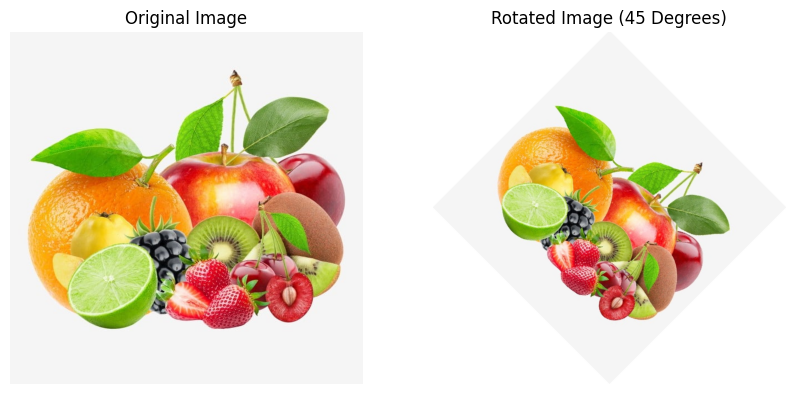

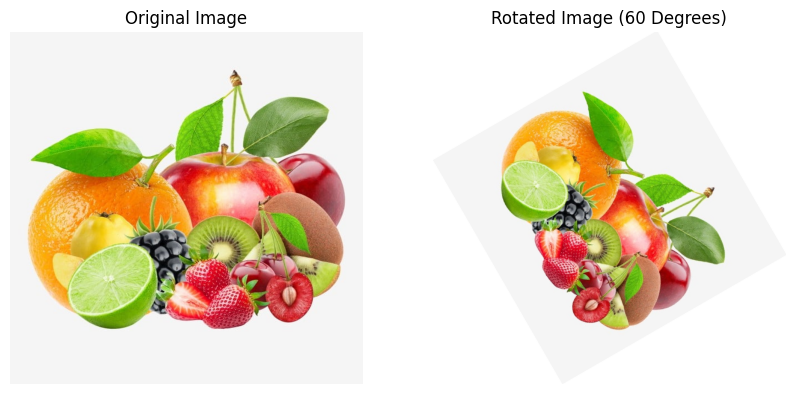

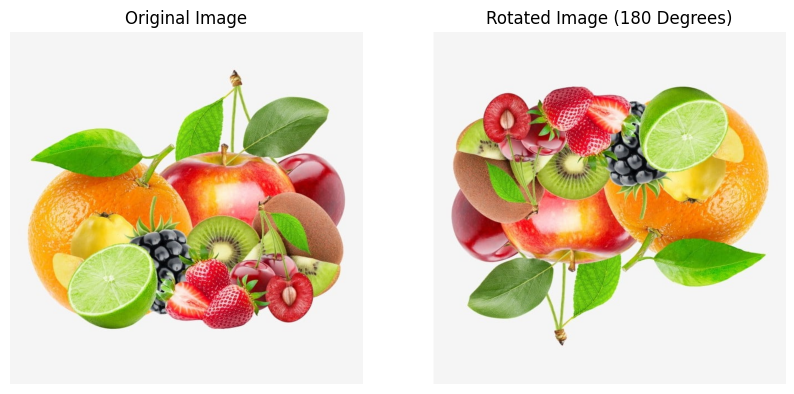

In [34]:
from PIL import Image
import math
import matplotlib.pyplot as plt
import numpy as np

def rotate_image(image_path, angle):
    # Load gambar
    image = Image.open(image_path)
    image_pixel = image.load()
    width, height = image.size

    # Hitung ukuran gambar baru setelah rotasi
    angle_rad = math.radians(angle)
    new_width = int(abs(math.cos(angle_rad)) * width + abs(math.sin(angle_rad)) * height)
    new_height = int(abs(math.sin(angle_rad)) * width + abs(math.cos(angle_rad)) * height)

    # Buat gambar baru untuk menyimpan hasil rotasi
    rotated_image = Image.new("RGB", (new_width, new_height))
    rotated_pixels = rotated_image.load()

    # Hitung pusat gambar yang baru
    x_center = new_width // 2
    y_center = new_height // 2

    # Rotasi setiap pixel dalam gambar baru
    for x_new in range(new_width):
        for y_new in range(new_height):
            # Hitung koordinat asli setelah rotasi
            x = int((x_new - x_center) * math.cos(angle_rad) + (y_new - y_center) * math.sin(angle_rad) + width // 2)
            y = int((-1) * (x_new - x_center) * math.sin(angle_rad) + (y_new - y_center) * math.cos(angle_rad) + height // 2)

            # Set pixel baru ke gambar hasil rotasi jika koordinat valid
            if 0 <= x < width and 0 <= y < height:
                rotated_pixels[x_new, y_new] = image_pixel[x, y]
            else:
                rotated_pixels[x_new, y_new] = (255, 255, 255)

    nama_setelah_disave = 'rotasi_gambar' + str(angle) + '.jpg'
    rotated_image.save(nama_setelah_disave)

     # Plot gambar hasil rotasi dan gambar asli
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(rotated_image)
    ax[1].set_title('Rotated Image ({} Degrees)'.format(angle))
    ax[1].axis('off')

    plt.show()


# Panggil fungsi rotasi gambar dengan sudut rotasi 45 derajat
rotate_image("buah.jpg", 45)
rotate_image("buah.jpg", 60)
rotate_image("buah.jpg", 180)
